<a href="https://colab.research.google.com/github/wayne0git/ml_cv_basics/blob/master/ocr/ocr_paddleocr_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PaddleOCR Example
Ref - https://github.com/spmallick/learnopencv/tree/master/Optical-Character-Recognition-using-PaddleOCR/PaddleOCR

## Environment Preparation

In [ ]:
!pip install paddlepaddle-gpu
!pip install paddleocr

## Import Library

In [12]:
from paddleocr import PaddleOCR

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

## Inference

In [6]:
IMG_FPATH = 'test.jpg'

In [ ]:
# Initializing OCR, OCR will automatically download PP-OCRv3 detector, recognizer and angle classifier.
ocr = PaddleOCR(use_angle_cls=True)

In [ ]:
# Perform OCR
result = ocr.ocr(IMG_FPATH)

In [10]:
# Extracting boxes, texts and its score from the output list.
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]

## Visualization

In [8]:
# Load image data
image = cv2.imread(IMG_FPATH)

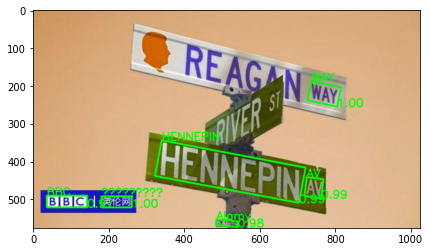

In [29]:
# Draw result
img_show = image.copy()
for box, txt, score in zip(boxes, txts, scores):
    pts = np.array(box, np.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(img_show, [pts], True, (0, 255, 0), 4)
    cv2.putText(img_show, txt, (pts[0, 0, 0], pts[0, 0, 1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(img_show, '%.2f' % score, (pts[2, 0, 0], pts[2, 0, 1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

fig = plt.figure(figsize=(8, 4))
plt.imshow(img_show)